# Chapter 1. Computer Arithmetic

## 1.1 Positional Systems
$\beta \in \mathbb{Z}, \beta \ge 2$ : Integer base

For $\sigma \in \{-1, 1\}$, $b_i \in \{ 0, 1, \ldots, \beta-1\}$,

\begin{align*}
(-1)^\sigma (b_n b_{n-1} \cdots b_0 . b_{-1} b_{-2} \cdots)_\beta
&:= (-1)^\sigma \sum_{i=-\infty}^n b_i \beta^i  \\
&= (-1)^\sigma (b_n \beta^n + b_{n-1} \beta^{n-1} + \cdots + b_0 + b_{-1} \beta^{-1} + b_{-2} \beta^{-2} + \cdots)
\end{align*}

Condition (a) $0 \le b_i \le \beta - 1$ for all $i$.

Condition (b) $0 \le b_i \le \beta - 2$ for infinitely many $i$.

**Prop**. For all nonzero $x \in \mathbb{R}$ has a unique representation above.

**Proof**. (Uniqueness) Let $x = (-1)^\sigma \sum_{i=-\infty}^n b_i \beta^i = (-1)^{\sigma^\prime} \sum_{i=-\infty}^{n^\prime} b^\prime_i \beta^i$.
We can assume $\sigma = \sigma^\prime = 1$ and $n \ge n^\prime$. Set $b_i = 0$ for $b_i^\prime = 0$ for $n < i \le n^\prime$.
By (b) we have $|b_n - b^\prime_n|\beta^n =  |b_n \beta^n - b^\prime_n\beta^n| \le \sum_{i=-\infty}^{n-1}|b_i^\prime - b_i|\beta^i <
\sum_{i=-\infty}^{n-1}(\beta-1)\beta^i = (\beta - 1)\beta^{n-1}\frac{1}{1-1/\beta} = \beta^n$.
Since $b_n, b_n^\prime \in \mathbb{Z}$ and $|b_n - b_n^\prime| < 1 $, we get $b_n = b_n^\prime$.
It is clear that $x - b_n$ also satisfies the conditions (a) and (b), we conclude $b_{n-1} = b_{n-1}^\prime$.
By continuing this process, we see $b_i = b_i^\prime$ for all $i$.

(Existance) Without loss of generality, we can assume $x > 0$.
By dividing $x$ by some $\beta^i$, it suffices to show when $0 < x \le 1$.
The existance is trivial if $x = 1$. We recursively construct for all $n > 0$,
an expression $x_n^\prime = \Sigma_{i=1}^n b_{-i}\beta^{-i}$ such that $0 \le x - x_n^\prime < \beta^{-n}$.
Let $b_{-1}$ be the integer $i \in [0, \beta - 1]$ such that $x \in [i \beta^{-1}, (i+1) \beta^{-1})$.
It is clear that $0 \le x - x_1^\prime < \beta^{-1}$.
Reaplacing $x$ by $(x - x_1^\prime)/\beta$ and follow the same procesure, we can find $b_{-2}$.
Continuing this process, we obtain a sequence $b_{-i}$.
If this sequance violates the condition (b), there exists $m$ such that $b_{-i} = \beta - 1$ for all $i > m$.
By constuction, $x - x_{m-1}^\prime < \beta^{-m}$ but $x - x_{m-1}^\prime = \Sigma_{i=m}^{\infty} (\beta-1)\beta^{-i} = \beta^{-m}$, it leads a contradiction.

## 1.2 Floating Point Numbers
\begin{align*}
\mathbb{R} \supset &\mathbb{F}_\beta = \{ (-1)^\sigma m \times \beta^e \mid m = (b_0 . b_{-1} b_{-2} \cdots)_\beta, m \text{ satisfies (a) and (b)} \} \\
\supset &\mathbb{F}_{\beta, p} = \{ x \in \mathbb{F}_\beta \mid m = (b_0 . b_{-1} b_{-2} \cdots b_{p-1})_\beta \} \\
\supset &\mathbb{F}_{\beta, p}^{\check{e}, \hat{e}} = \{ x \in \mathbb{F}_{\beta, p} \mid \check{e} \le e \le \hat{e} \}
\end{align*}
$m$ : *mantiss*a of $x$, $e$ : *exponent* of $x$, $p$ : *precision*

$\mathbb{F}_\beta$ : *floating point numbers*

$\mathbb{F}_{\beta, p}^{\check{e}, \hat{e}} $ : *computer representable floating point numbers*

**Def**. We say a floating point number $x = (-1)^\sigma (b_0 . b_{-1} b_{-2} \cdots)_\beta \times \beta^e$ is *normalized* if the leading digit $b_0$ is non-zero.

Let's show the *largest positive normal number* $N_{max}^n$ and
the *smallest positive normal number* $N_{min}^n$.
The (union of) range $\{ x \in \mathbb{R} \mid N_{min}^n \le |x| \le N_{max}^n \}$ is said to be the *normalized range*.

In [1]:
# Normalized range
const FloatTypes = (Float16, Float32, Float64)

for T in FloatTypes
    println("Normalized range of $(T) is ", floatmin(T), " <= |x| <= ", floatmax(T))
end

Normalized range of Float16 is 6.104e-5 <= |x| <= 6.55e4
Normalized range of Float32 is 1.1754944e-38 <= |x| <= 3.4028235e38
Normalized range of Float64 is 2.2250738585072014e-308 <= |x| <= 1.7976931348623157e308


### 1.2.1 Subnormal numbers
**Def**. $x \in \mathbb{F}_{\beta, p}^{\check{e}, \hat{e}}$ is said to be *subnormal* if $b_0 = 0$ and $e = \check{e}$.

In [2]:
for T in FloatTypes
    println("$(T) N_min^s = ", nextfloat(zero(T)), ", N_max^s = ", prevfloat(floatmin(T)))
end

Float16 N_min^s = 6.0e-8, N_max^s = 6.1e-5
Float32 N_min^s = 1.0e-45, N_max^s = 1.1754942e-38
Float64 N_min^s = 5.0e-324, N_max^s = 2.225073858507201e-308


## 1.3. Rounding
Let $\mathbb{R}^* = \mathbb{R} \cup \{ -\infty, +\infty \}, \mathbb{F}^* = \mathbb{F} \cup \{ -\infty, \infty \}$.

**Def**. A *rounding* is a mapping $\bigcirc : \mathbb{R}^* \rightarrow \mathbb{F}^*$ satisfying the conditions (R1) and (R2):

(R1) $x \in \mathbb{F}^* \Rightarrow \bigcirc (x) = x$.

(R2, *Maximum quality*) $x, y \in \mathbb{R}^*, x \le y \Rightarrow \bigcirc (x) \le \bigcirc (y)$

**Def**. Let $\bigcirc$ be a rounding.

(R3) $\bigcirc$ is *odd* if $\bigcirc (-x) = - \bigcirc (x)$ for all $x \in \mathbb{R}^*$.

(R4a) $\bigcirc$ is *round toward minus infinity* if $\bigcirc (x) \le x$ for all $x \in \mathbb{R}^*$.

(R4a) $\bigcirc$ is *round toward plus infinity* if $\bigcirc (x) \ge x$ for all $x \in \mathbb{R}^*$.

**Example**.
*Rounded down:* $\triangledown (x) = \max \{y \in \mathbb{F}^* \mid y \le x\}$,

*Rounded up:* $\triangle (x) = \min \{y \in \mathbb{F}^* \mid y \ge x\}$.

If $x \in \mathbb{F}^*$, then $\triangledown (x) = x = \triangle (x)$, on the contrary
if $x \notin \mathbb{F}^*$,  we have $\triangledown (x) = x = \triangle (x)$

$\triangledown$ and $\triangle$ give the lower bound and upper bound of roundings: if $\bigcirc$ is a rounding,
$\triangledown (x) \le \bigcirc (x) \le \triangle (x)$ for all $x$.

### 1.3.1 Round to Zero
**Def**. $\square_z : \mathbb{R}^* \rightarrow \mathbb{F}^*, \square_z (x) =
\text{sign} (x) \max \{ y \in \mathbb{F}^* \mid y \le |x| \} =
\text{sign} (x) \triangledown (|x|)$.

### 1.3.4 Rounding Errors

In [3]:
using Printf

for T in FloatTypes
    @printf("1//10, %s, Round down = %0.17f, Round up = %0.17f\n", T, T(1//10, RoundDown), T(1//10, RoundUp))
end

1//10, Float16, Round down = 0.09997558593750000, Round up = 0.10003662109375000
1//10, Float32, Round down = 0.09999999403953552, Round up = 0.10000000149011612
1//10, Float64, Round down = 0.09999999999999999, Round up = 0.10000000000000001


## 1.4. Floating Point Arithmetic

In [4]:
# tenary shift map
tenary_shift(x) = mod(3x, 1)

let x = 0.1
    for i in 0:52
        @printf("x(%d) = %0.17f\n", i, x)
        x = tenary_shift(x)
    end
end

x(0) = 0.10000000000000001
x(1) = 0.30000000000000004
x(2) = 0.90000000000000013
x(3) = 0.70000000000000018
x(4) = 0.10000000000000053
x(5) = 0.30000000000000160
x(6) = 0.90000000000000480
x(7) = 0.70000000000001439
x(8) = 0.10000000000004317
x(9) = 0.30000000000012950
x(10) = 0.90000000000038849
x(11) = 0.70000000000116547
x(12) = 0.10000000000349640
x(13) = 0.30000000001048921
x(14) = 0.90000000003146763
x(15) = 0.70000000009440289
x(16) = 0.10000000028320866
x(17) = 0.30000000084962597
x(18) = 0.90000000254887791
x(19) = 0.70000000764663373
x(20) = 0.10000002293990118
x(21) = 0.30000006881970354
x(22) = 0.90000020645911061
x(23) = 0.70000061937733182
x(24) = 0.10000185813199547
x(25) = 0.30000557439598641
x(26) = 0.90001672318795922
x(27) = 0.70005016956387767
x(28) = 0.10015050869163300
x(29) = 0.30045152607489900
x(30) = 0.90135457822469700
x(31) = 0.70406373467409100
x(32) = 0.11219120402227301
x(33) = 0.33657361206681902
x(34) = 0.00972083620045705
x(35) = 0.02916250860137115
x(

In [5]:
# Machine epsilon
for T in FloatTypes
    println("Machine epsilon of $(T) = ", eps(T))
end

# Machine epsilon
for T in FloatTypes
    println("Machine eta of $(T) = ", eps(zero(T)))
end

Machine epsilon of Float16 = 0.000977
Machine epsilon of Float32 = 1.1920929e-7
Machine epsilon of Float64 = 2.220446049250313e-16
Machine eta of Float16 = 6.0e-8
Machine eta of Float32 = 1.0e-45
Machine eta of Float64 = 5.0e-324


## 1.5. The IEEE standard

In [6]:
using Base: exponent_bits, exponent_mask, exponent_one, significand_bits
for T in FloatTypes
    # The followings are defined on >= 1.4
    @eval exponent_bias(::Type{$T}) = $(Int(exponent_one(T) >> significand_bits(T)))
    @eval exponent_max(::Type{$T}) = $(Int(exponent_mask(T) >> significand_bits(T)) - exponent_bias(T))

    println("$(T), exponent width in bits = ", exponent_bits(T), ", precision = ", precision(T),
            ", exponent bias = ", exponent_bias(T), ", maximal exponent = ", exponent_max(T))
end

Float16, exponent width in bits = 5, precision = 11, exponent bias = 15, maximal exponent = 16
Float32, exponent width in bits = 8, precision = 24, exponent bias = 127, maximal exponent = 128
Float64, exponent width in bits = 11, precision = 53, exponent bias = 1023, maximal exponent = 1024


In [7]:
ieee_digits(::Type{T}) where {T<:Base.IEEEFloat} = (1, Base.exponent_bits(T), precision(T) - 1)

function print_float_format(x::T) where {T<:Base.IEEEFloat}
    bit_x = bitstring(x)
    digits = ieee_digits(T)
    n = sum(digits) + Base.length(digits) + 1
    print("-")
    i = 1
    for j in digits
        print(bit_x[i:i+j-1], "-")
        i += j
    end
    println()
end

print_float_format (generic function with 1 method)

In [8]:
# Bitstring expression of normalized range
for T in FloatTypes
    n_min_n = floatmin(T)
    n_max_n = floatmax(T)
    println("The smallest positive normal number of $(T) = ", n_min_n)
    print_float_format(n_min_n)
    println()
    println("The largest normal number of $(T) = ", n_max_n)
    print_float_format(n_max_n)
    println()
end

The smallest positive normal number of Float16 = 6.104e-5
-0-00001-0000000000-

The largest normal number of Float16 = 6.55e4
-0-11110-1111111111-

The smallest positive normal number of Float32 = 1.1754944e-38
-0-00000001-00000000000000000000000-

The largest normal number of Float32 = 3.4028235e38
-0-11111110-11111111111111111111111-

The smallest positive normal number of Float64 = 2.2250738585072014e-308
-0-00000000001-0000000000000000000000000000000000000000000000000000-

The largest normal number of Float64 = 1.7976931348623157e308
-0-11111111110-1111111111111111111111111111111111111111111111111111-



In [9]:
# Subnormal numbers
for T in FloatTypes
    n_min_s = nextfloat(zero(T))
    n_max_s = prevfloat(floatmin(T))
    println("The smallest positive subnormal number of $(T) = ", n_min_s)
    print_float_format(n_min_s)
    println()

    println("The largest subnormal number of $(T) = ", n_max_s)
    print_float_format(n_max_s)
    println()
end

The smallest positive subnormal number of Float16 = 6.0e-8
-0-00000-0000000001-

The largest subnormal number of Float16 = 6.1e-5
-0-00000-1111111111-

The smallest positive subnormal number of Float32 = 1.0e-45
-0-00000000-00000000000000000000001-

The largest subnormal number of Float32 = 1.1754942e-38
-0-00000000-11111111111111111111111-

The smallest positive subnormal number of Float64 = 5.0e-324
-0-00000000000-0000000000000000000000000000000000000000000000000001-

The largest subnormal number of Float64 = 2.225073858507201e-308
-0-00000000000-1111111111111111111111111111111111111111111111111111-



In [10]:
# NaN, -Inf, Inf
for T in FloatTypes
    ninf = T(-Inf)
    inf = T(Inf)
    println("NaN of $(T):")
    print_float_format(T(NaN))
    println()

    println("-Inf of $(T):")
    print_float_format(T(-Inf))
    println()

    println("Inf of $(T):")
    print_float_format(T(Inf))
    println()
end

NaN of Float16:
-0-11111-1000000000-

-Inf of Float16:
-1-11111-0000000000-

Inf of Float16:
-0-11111-0000000000-

NaN of Float32:
-0-11111111-10000000000000000000000-

-Inf of Float32:
-1-11111111-00000000000000000000000-

Inf of Float32:
-0-11111111-00000000000000000000000-

NaN of Float64:
-0-11111111111-1000000000000000000000000000000000000000000000000000-

-Inf of Float64:
-1-11111111111-0000000000000000000000000000000000000000000000000000-

Inf of Float64:
-0-11111111111-0000000000000000000000000000000000000000000000000000-



## 1.6. Examples of Floating Point Computations

In [11]:
rump(x::Real, y::Real) = 333.75y^6 + x^2 * (11x^2 * y^2 - y^6 - 121y^4 -2) + 5.5y^8 + x/(2y)

x, y = 77617, 33096
for T in FloatTypes
    println("rump(x, y) = ", rump(T(x), T(y)))
end

rump(x, y) = NaN
rump(x, y) = -7.498166890187347e29
rump(x, y) = -1.1805916207174113e21


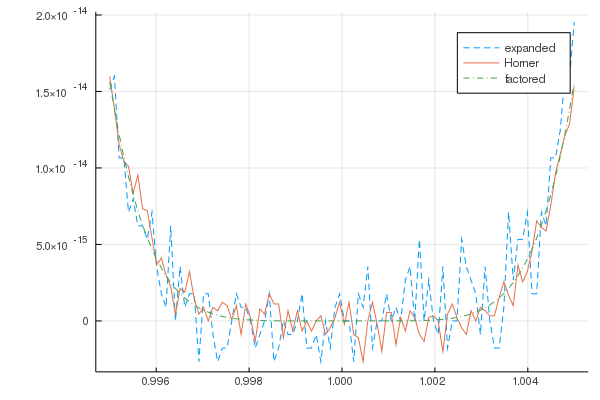

In [12]:
using Plots

xs = range(0.995, 1.005, length = 100)

# Expanded
p1(t) = t^6 - 6t^5 + 15t^4 - 20t^3 + 15t^2 - 6t + 1
plot(xs, p1.(xs), ls = :dash, label = "expanded")

# Horner
p2(t) = (((((t - 6) * t + 15) * t - 20) * t + 15) * t - 6) * t +1
plot!(xs, p2.(xs), ls = :solid, label = "Horner")

# factored
p3(t) = (t - 1)^6
plot!(xs, p3.(xs), ls = :dashdot, label = "factored")

## 1.7 Computer Lab 1

In [13]:
for i in 1:1000000000
    x = nextfloat(1.0, i)
    y = 1/x
    if x * y != 1.0
        @printf("x = %0.17f\n", x)
        print_float_format(x)
        break
    end
end

x = 1.00000005722899710
-0-01111111111-0000000000000000000000001111010111001011111100101010-


In [14]:
prob4(x, y) = 9x^4 - y^4 + 2y^2

x, y = 40545, 70226

for T in FloatTypes
    println("f(x, y) = ", prob4(T(x), T(y)))
end

f(x, y) = NaN
f(x, y) = 9.863382e9
f(x, y) = 1160.0


Correct answer is (3x^2 - x^2)(3x^y + x^2) + 2y^2 = -1 * 9863382151 + 9863382152 = 1

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*